<a href="https://colab.research.google.com/github/GulnazAleksashova/go-off/blob/main/Authors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import plot_model
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split 
from google.colab import drive 

import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка текстов

In [2]:
# Функция для чтения файлов
def readText (fileName): 
    f = open(fileName, 'r')
    text = f.read()
    text = text.replace('/n', ' ')
    return text

In [3]:
# Загружаем обучающие тексты
trainText = []
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Рэй Брэдберри) Обучающая_22 вместе.txt')) 

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"] # задаем названия классов
nClasses = len(className) #количество классов

# Загружаем тестовые тексты
testText = []
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Рэй Брэдберри) Тестовая_8 вместе.txt'))

In [4]:
# Создание словаря частотности по индексам
maxWordsCount = 20000 # ограничиваем индексы словаря
tokenizer = Tokenizer(num_words = maxWordsCount, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', 
                      lower=True, split=' ', char_level=False, oov_token = 'unknown') # текст токенизируется по словам
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())

In [6]:
print(items[:13])

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13)]


In [7]:
print('Индекс слова в словаре: ', tokenizer.word_index[input('Введите слово: ')])

Введите слово: сеть
Индекс слова в словаре:  13123


In [5]:
# Преобразование текста в последовательность индексов согласно словарю частотности
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # обучающие тексты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)   # проверочные тексты в индексы

print('Оригинальный текст:                             ', trainText[0][0:100])
print('Тот же текст в виде последовательности индексов:', trainWordIndexes[0][0:20])

Оригинальный текст:                              «Лиса-на-рассвете»


Коралио нежился в полуденном зное, как томная красавица в сурово хранимом гарем
Тот же текст в виде последовательности индексов: [1, 7, 1, 1733, 1, 3, 1, 1, 11, 1, 7515, 3, 3237, 1, 1, 274, 1045, 16, 257, 2119]


In [6]:
# Статистика по выборкам
print('Обучающая выборка: ')
for i in range(6):
    print(className[i], ' ', len(trainText[i]), ' символов, ', len(trainWordIndexes[i]), ' слов')
print('Всего', len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), ' символов, ',
      len(trainWordIndexes[0])+len(trainWordIndexes[1])+len(trainWordIndexes[2])+len(trainWordIndexes[3])+
      len(trainWordIndexes[4])+len(trainWordIndexes[5]), ' слов')
print()
print('Тестовая выборка: ')
for i in range(6):
    print(className[i], ' ', len(testText[i]), ' символов, ', len(testWordIndexes[i]), ' слов')
print('Всего ', len(testText[0])+len(testText[1])+len(testText[2])+
      len(testText[3])+len(testText[4])+len(testText[5]), ' символов, ', 
      len(testWordIndexes[0])+len(testWordIndexes[1])+len(testWordIndexes[2])+len(testWordIndexes[3])
      +len(testWordIndexes[4])+len(testWordIndexes[5]), ' слов')

Обучающая выборка: 
О. Генри   1049517  символов,  160682  слов
Стругацкие   2042469  символов,  313405  слов
Булгаков   1765648  символов,  262109  слов
Саймак   1609507  символов,  251551  слов
Фрай   3700010  символов,  569052  слов
Брэдбери   1386454  символов,  214694  слов
Всего 11553605  символов,  1771493  слов

Тестовая выборка: 
О. Генри   349662  символов,  53255  слов
Стругацкие   704846  символов,  108730  слов
Булгаков   875042  символов,  132910  слов
Саймак   318811  символов,  50362  слов
Фрай   1278191  символов,  196911  слов
Брэдбери   868673  символов,  132746  слов
Всего  4395225  символов,  674914  слов


# Подготовка выборки  для обучения

In [7]:
# Функция, делящая вектор индексов на равные части с заданным шагом
def getSetFromIndexes(wordIndexes, xLen, step): # принимает последовательность индексов, размер окна, шаг окна
    xSample = []
    wordsLen = len(wordIndexes)
    index = 0 

    while (index + xLen <= wordsLen):
        xSample.append(wordIndexes[index:index+xLen])
        index += step
    
    return xSample

In [8]:
# Функция, формирующая общую обучающую выборку, разделенную скользящим окном на равные части, по всем авторам.
def createSetsMultiClasses(wordIndexes, xLen, step): 
    nClasses = len(wordIndexes) 
    classesXSamples = []        # список векторов индексов заданного размера по всем классам
    for wI in wordIndexes:      
        classesXSamples.append(getSetFromIndexes(wI, xLen, step))  

  # Формируем один общий xSamples
    xSamples = [] # Итоговая обучающая выборка
    ySamples = [] # Метки классов 
  
    for t in range(nClasses):  # 
        xT = classesXSamples[t]  
        for i in range(len(xT)):
            xSamples.append(xT[i]) 
    
    # Формируем ySamples по номеру класса
        currY = utils.to_categorical(t, nClasses) # в формате OHE
        for i in range(len(xT)): 
            ySamples.append(currY) 

    xSamples = np.array(xSamples) 
    ySamples = np.array(ySamples) 

  
    return (xSamples, ySamples)   

In [9]:
xLen = 1000
step = 100

In [10]:
# Итоговые выборки в виде последовательности индексов
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) # извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)  
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

# функция работает неправильно. разобраться почему y train не такой же длины как x train

(17658, 1000)
(17658, 6)
(6693, 1000)
(6693, 6)


In [11]:
# Преобразование выборок в вид Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) 
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) 

print(xTrain01.shape)       # Размер обучающей выборки, сформированной в виде Bag of Words векторов
print(xTrain01[0][0:50]) 

(17658, 20000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0.]


In [12]:
# Функция расспознавания тестовой выборки 

def createTestMultiClasses(wordIndexes, xLen, step): 
    nClasses = len(wordIndexes) 
    xTest6Classes01 = []             
    xTest6Classes = []                
    for wI in wordIndexes:             
        sample = (getSetFromIndexes(wI, xLen, step)) 
        xTest6Classes.append(np.array(sample))      
        xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) 
    xTest6Classes01 = np.array(xTest6Classes01)                    
  
    return xTest6Classes01, xTest6Classes 


# Выводим результаты

def recognizeMultiClass(model, xTest, modelName):
    print("МОДЕЛЬ: ", modelName)
    print()
  
    val = []
    pred = []
  
    totalSumRec = []
  
  # Проходим по всем классам
    for i in range(nClasses):
    # Получаем результаты распознавания класса по блокам слов длины xLen
        currPred = model.predict(xTest[i])
        pred.append(currPred)
        currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса 
    # Получам матрицу 6 на 6
        evVal = []
        sumRec = []
        for j in range(nClasses):
            sumRec.append(0)
            for t in range(len(currOut)):
                if (currOut[t] == j):
                    sumRec[j] += 1
            evVal.append(sumRec[j] / len(currOut))
    
        totalSumRec.append(sumRec[i])
    
    # Определяем, как был распознан каждый кусок текста
        val.append(evVal[i])
        recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
        isRecognized = "распознано НЕ ВЕРНО!"
        if (recognizedClass == i):
            isRecognized = "распознано ВЕРНО!"
        print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим средний процент распознавания по всем классам вместе
    print()
    sumVal = 0
    sumCount = 0
    lenXtest = []
    for i in range(nClasses):
        sumCount += len(xTest[i])
        sumVal += totalSumRec[i]
    print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    print()
    return sumVal/sumCount



In [ ]:
xTestBoW, xTestEmbedding = createTestMultiClasses(testWordIndexes, xLen, step)

# Архитектура нейронной сети

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

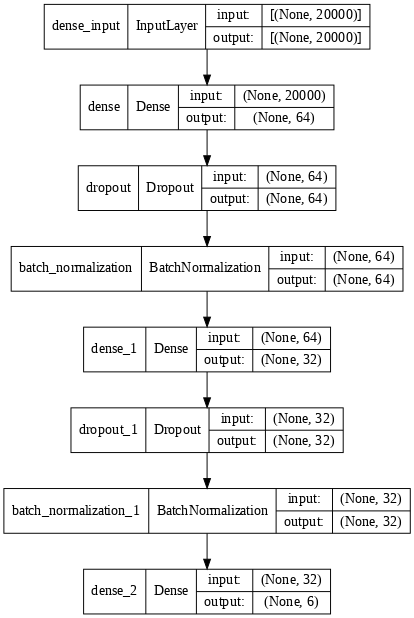

In [14]:
model = Sequential() # Последовательная модель нейросети
model.add(Dense(64, input_dim=maxWordsCount, activation='relu'))
model.add(Dropout(0.3)) 
model.add(BatchNormalization()) 
model.add(Dense(32, input_dim=maxWordsCount, activation='relu'))
model.add(Dropout(0.3)) 
model.add(BatchNormalization()) 
model.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes = True, dpi=70)

# Обучение сети

In [15]:
# Обучение векторах из индексов, согласно словарю частотности
history1 = model.fit(xTrain01, yTrain, batch_size=512, epochs = 50, verbose = 1, 
                     validation_data=(xTest01, yTest)
                     )
                     
                     

Epoch 1/50
35/35 [==============================] - 4s 49ms/step - loss: 1.2902 - accuracy: 0.5277 - val_loss: 1.5298 - val_accuracy: 0.4998
Epoch 2/50
35/35 [==============================] - 1s 32ms/step - loss: 0.6364 - accuracy: 0.8120 - val_loss: 1.3934 - val_accuracy: 0.5929
Epoch 3/50
35/35 [==============================] - 1s 33ms/step - loss: 0.4632 - accuracy: 0.8882 - val_loss: 1.2931 - val_accuracy: 0.6573
Epoch 4/50
35/35 [==============================] - 1s 32ms/step - loss: 0.3762 - accuracy: 0.9235 - val_loss: 1.1845 - val_accuracy: 0.7055
Epoch 5/50
35/35 [==============================] - 1s 32ms/step - loss: 0.3157 - accuracy: 0.9447 - val_loss: 1.0811 - val_accuracy: 0.7358
Epoch 6/50
35/35 [==============================] - 1s 32ms/step - loss: 0.2782 - accuracy: 0.9554 - val_loss: 0.9781 - val_accuracy: 0.7641
Epoch 7/50
35/35 [==============================] - 1s 33ms/step - loss: 0.2422 - accuracy: 0.9650 - val_loss: 0.9048 - val_accuracy: 0.7844
Epoch 8/50
35

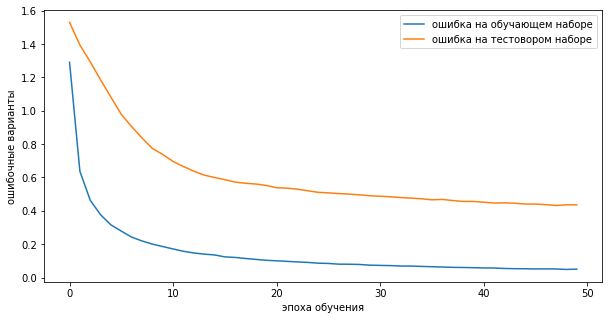

In [16]:
# Визуализация процесса обучения
plt.figure(figsize=(10,5))
plt.plot(history1.history['loss'], label ='ошибка на обучающем наборе')
plt.plot(history1.history['val_loss'], label = 'ошибка на тестовором наборе')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибочные варианты')
plt.legend()
plt.show()

In [17]:
pred1 = recognizeMultiClass(model, xTestBoW, 'Authors recognition') 

МОДЕЛЬ:  Authors recognition

О. Генри  распознано  90 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  86 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  89 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  86 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  87 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  85 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  87 %

